In [51]:
import pandas as pd
import plotly.express as px

In [32]:
df = pd.read_csv("data/dom_2025-01-11_export.csv")
df

,Date,Description,Category,Cost,Currency,Michał Bieroński,Anna Bierońska
0,2018-07-27,Zakupy,General,116.00,PLN,-58.00,58.00
1,2018-07-27,Sandały,General,130.00,PLN,-130.00,130.00
2,2018-07-27,Skarpetki tkmaxx,General,40.00,PLN,-40.00,40.00
3,2018-07-27,Uber,Taxi,10.00,PLN,-5.00,5.00
4,2018-07-27,Bilety do Katowic,General,32.00,PLN,-16.00,16.00
...,...,...,...,...,...,...,...
3832,2025-01-09,Zooplus,Pets,589.20,PLN,-294.60,294.60
3833,2025-01-10,Organizer do szuflady,Furniture,111.67,PLN,0.00,0.00
3834,2025-01-11,Chleb,Groceries,17.00,PLN,-8.50,8.50
3835,2025-01-22,Ubezpieczenie OC samochodu,Insurance,523.00,PLN,-261.50,261.50


In [33]:
df.dtypes

Date                 object
Description          object
Category             object
Cost                 object
Currency             object
Michał Bieroński    float64
Anna Bierońska      float64
dtype: object

In [34]:
df = df[:-1]
df = df[df["Category"] != "Payment"]

In [35]:
df["Cost"] = df["Cost"].str.strip().astype(float)

In [36]:
df["Date"] = pd.to_datetime(df["Date"])

In [48]:
df.groupby(by=["Category", df['Date'].dt.year])["Cost"].sum().to_csv("data/totals_yearly.csv")

In [50]:
df = df[df["Date"].dt.year >= 2022]

In [53]:
df.groupby(by=["Category", df['Date'].dt.year])["Cost"].sum().reset_index()

,Category,Date,Cost
0,Bus/train,2022,287.31
1,Bus/train,2023,1169.23
2,Bus/train,2024,499.90
3,Car,2022,4862.00
4,Car,2023,4165.19
...,...,...,...
101,Transportation - Other,2023,1710.01
102,Trash,2023,105.13
103,Utilities - Other,2022,229.00
104,Utilities - Other,2023,75.00


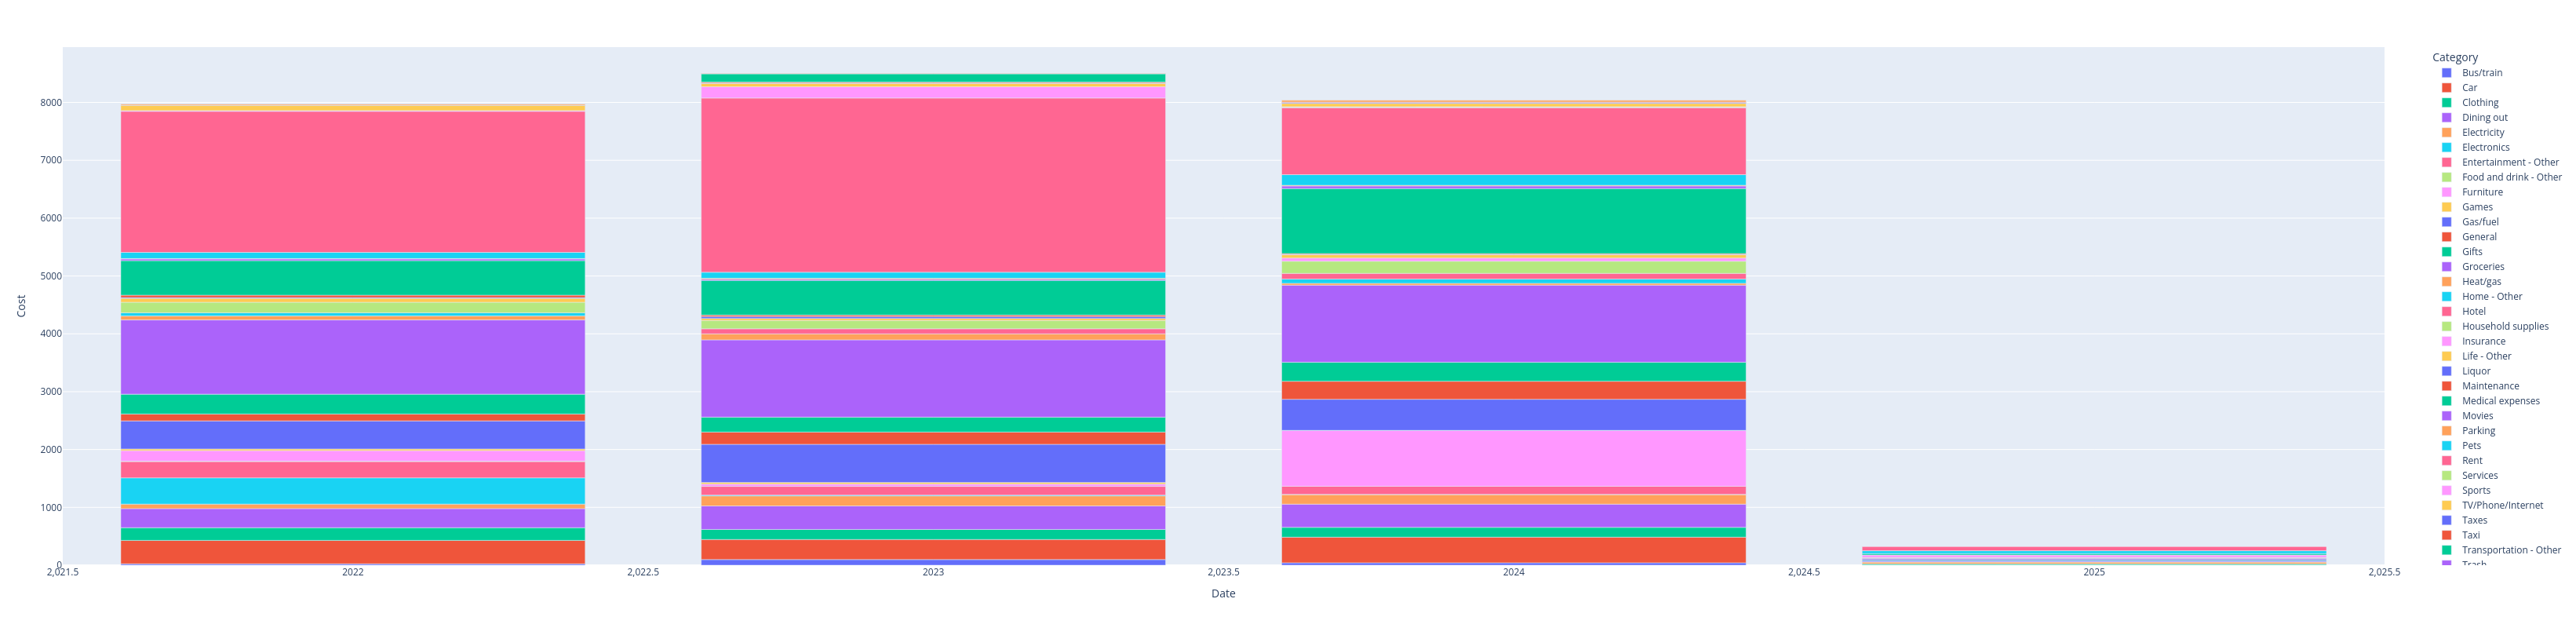

In [59]:
px.bar((df.groupby(by=["Category", df['Date'].dt.year])["Cost"].sum() / 12).reset_index(), x="Date", y="Cost", color="Category", height=800)